In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
from sklearn.preprocessing import MinMaxScaler

In [4]:
from matplotlib import pyplot as plt

In [5]:
import seaborn as sns

In [8]:
from sklearn.neighbors import KNeighborsClassifier as KNNClassifier

In [11]:
from sklearn.svm import SVC

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
dataframe = pd.read_csv('CarLoan_Dataset.csv', nrows=10000)
dataframe

,Loan ID,Customer ID,CarLoan Status,Car Loan Amount,Term,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412,Short Term,709.0,1167493.0,5214.74,17.2,NaN,6,1,228190,416746,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328,Short Term,NaN,NaN,33295.98,21.1,8.0,35,0,229976,850784,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999,Short Term,741.0,2231892.0,29200.53,14.9,29.0,18,1,297996,750090,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666,Long Term,721.0,806949.0,8741.90,12.0,NaN,9,0,256329,386958,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220,Short Term,NaN,NaN,20639.70,6.1,NaN,15,0,253460,427174,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,084f0ba2-204c-4b43-a131-5a72142e513c,1c96581f-1e05-40ca-997a-7bb62b16b6be,Charged Off,143594,Short Term,736.0,1024917.0,12982.13,8.1,40.0,14,0,235334,604186,0.0,0.0
9996,86c20a91-92d1-4dcd-bf73-9f1392b77519,7bf1820e-7de2-4e5b-a259-57cfa20d070c,Fully Paid,400158,Long Term,NaN,NaN,7084.53,15.5,NaN,3,0,332557,422202,0.0,0.0
9997,c062a82a-cf71-425b-a152-f38bdaccc408,7a93d940-5c07-4c5c-9774-62be30aa9e54,Fully Paid,154462,Short Term,751.0,833796.0,10630.88,17.4,NaN,7,0,76494,517902,0.0,0.0
9998,7a36b0f6-1c19-4984-87d7-d4db3e6ea260,ca417f48-23e0-447a-b0e2-13e0c4f42f26,Fully Paid,264484,Short Term,733.0,1427565.0,28313.42,10.8,NaN,22,0,324862,1245530,0.0,0.0


In [14]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan ID                       10000 non-null  object 
 1   Customer ID                   10000 non-null  object 
 2   CarLoan Status                10000 non-null  object 
 3   Car Loan Amount               10000 non-null  int64  
 4   Term                          10000 non-null  object 
 5   Credit Score                  8063 non-null   float64
 6   Annual Income                 8063 non-null   float64
 7   Monthly Debt                  10000 non-null  float64
 8   Years of Credit History       10000 non-null  float64
 9   Months since last delinquent  4702 non-null   float64
 10  Number of Open Accounts       10000 non-null  int64  
 11  Number of Credit Problems     10000 non-null  int64  
 12  Current Credit Balance        10000 non-null  int64  
 13  Ma

In [15]:
dataframe[list(dataframe.columns)].isnull().sum()

Loan ID                            0
Customer ID                        0
CarLoan Status                     0
Car Loan Amount                    0
Term                               0
Credit Score                    1937
Annual Income                   1937
Monthly Debt                       0
Years of Credit History            0
Months since last delinquent    5298
Number of Open Accounts            0
Number of Credit Problems          0
Current Credit Balance             0
Maximum Open Credit                0
Bankruptcies                      17
Tax Liens                          1
dtype: int64

In [16]:
print(dataframe['Tax Liens'].value_counts())
print(dataframe['Tax Liens'].unique())
print(dataframe['Tax Liens'].isnull().sum())

0.0    9789
1.0     152
2.0      38
3.0      12
6.0       3
4.0       3
5.0       2
Name: Tax Liens, dtype: int64
[ 0.  1.  2.  4.  3.  6.  5. nan]
1


In [17]:
dataframe['Tax Liens'] = dataframe['Tax Liens'].fillna(0)

In [18]:
print(dataframe['Bankruptcies'].value_counts())
print(dataframe['Bankruptcies'].unique())
print(dataframe['Bankruptcies'].isnull().sum())

0.0    8850
1.0    1076
2.0      46
3.0       7
4.0       2
5.0       2
Name: Bankruptcies, dtype: int64
[ 1.  0.  2.  3. nan  5.  4.]
17


In [19]:
dataframe['Bankruptcies'] = dataframe['Bankruptcies'].fillna(0)

In [20]:
dataframe.loc[dataframe['Months since last delinquent'].isnull(),'Months since last delinquent'] = 240
dataframe['Months since last delinquent'] = dataframe['Months since last delinquent'] - 240

In [21]:
NaNcount_AnnualIncome = []
NaNcount_CreditScore = []
NaNcount = []
for i in range(len(dataframe)):
    if np.isnan(dataframe['Annual Income'][i]) == True:
        NaNcount_AnnualIncome += [i]

for i in range(len(dataframe)):
    if np.isnan(dataframe['Credit Score'][i]) == True:
        NaNcount_CreditScore += [i]
        
    
for i in range(len(NaNcount_AnnualIncome)):
    if NaNcount_AnnualIncome[i] == NaNcount_CreditScore[i]:
        NaNcount += [i]

        
print('NaN count_AnnualIncome :',len(NaNcount_AnnualIncome))
print('NaN count_CreditScore : ',len(NaNcount_CreditScore))
print('NaN count :',len(NaNcount))

NaN count_AnnualIncome : 1937
NaN count_CreditScore :  1937
NaN count : 1937


In [22]:
dataframe.loc[dataframe['Credit Score'].isnull(),'Credit Score'] = 0
dataframe.loc[dataframe['Annual Income'].isnull(),'Annual Income'] = 0

In [23]:
dataframe[list(dataframe.columns)].isnull().sum()

Loan ID                         0
Customer ID                     0
CarLoan Status                  0
Car Loan Amount                 0
Term                            0
Credit Score                    0
Annual Income                   0
Monthly Debt                    0
Years of Credit History         0
Months since last delinquent    0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
Bankruptcies                    0
Tax Liens                       0
dtype: int64

In [24]:
dataframe['Maximum Open Credit'].describe().astype('int')

count        10000
mean        838886
std        8533290
min              0
25%         269747
50%         463848
75%         784696
max      632477736
Name: Maximum Open Credit, dtype: int32

In [25]:
dataframe = dataframe.dropna()
print(dataframe.isnull().sum())
print(len(dataframe))

Loan ID                         0
Customer ID                     0
CarLoan Status                  0
Car Loan Amount                 0
Term                            0
Credit Score                    0
Annual Income                   0
Monthly Debt                    0
Years of Credit History         0
Months since last delinquent    0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
Bankruptcies                    0
Tax Liens                       0
dtype: int64
10000


C:\Users\chowd\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

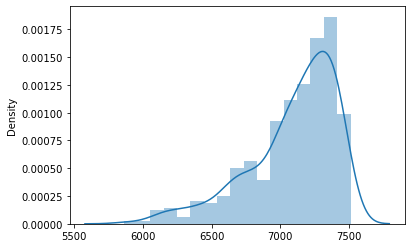

In [26]:
sns.distplot(dataframe.loc[dataframe['Credit Score']>850, ['Credit Score']])

In [27]:
dataframe.loc[dataframe['Credit Score']>850, ['Credit Score']] = (dataframe.loc[dataframe['Credit Score']>850, ['Credit Score']])/10

C:\Users\chowd\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Car Loan Amount', ylabel='Density'>

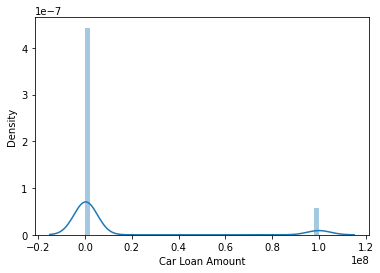

In [28]:
sns.distplot(np.around(dataframe['Car Loan Amount'], 1))

In [29]:
temp = dataframe.loc[dataframe['Car Loan Amount']==99999999, ['Car Loan Amount', 'Term', 'Months since last delinquent' ,'CarLoan Status']]
print(temp['Months since last delinquent'].value_counts())
print('-'*20)
print(temp['CarLoan Status'].value_counts())
print('-'*20)
print(temp['Term'].value_counts())

 0.0      633
-215.0     17
-233.0     13
-221.0     13
-228.0     13
         ... 
-198.0      2
-161.0      1
-182.0      1
-159.0      1
-174.0      1
Name: Months since last delinquent, Length: 84, dtype: int64
--------------------
Fully Paid    1136
Name: CarLoan Status, dtype: int64
--------------------
Short Term    916
Long Term     220
Name: Term, dtype: int64


In [30]:
dataframe = dataframe.loc[dataframe['Car Loan Amount']!=99999999]
dataframe

,Loan ID,Customer ID,CarLoan Status,Car Loan Amount,Term,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412,Short Term,709.0,1167493.0,5214.74,17.2,0.0,6,1,228190,416746,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328,Short Term,0.0,0.0,33295.98,21.1,-232.0,35,0,229976,850784,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666,Long Term,721.0,806949.0,8741.90,12.0,0.0,9,0,256329,386958,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220,Short Term,0.0,0.0,20639.70,6.1,0.0,15,0,253460,427174,0.0,0.0
5,89d8cb0c-e5c2-4f54-b056-48a645c543dd,4ffe99d3-7f2a-44db-afc1-40943f1f9750,Charged Off,206602,Short Term,729.0,896857.0,16367.74,17.3,0.0,6,0,215308,272448,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,084f0ba2-204c-4b43-a131-5a72142e513c,1c96581f-1e05-40ca-997a-7bb62b16b6be,Charged Off,143594,Short Term,736.0,1024917.0,12982.13,8.1,-200.0,14,0,235334,604186,0.0,0.0
9996,86c20a91-92d1-4dcd-bf73-9f1392b77519,7bf1820e-7de2-4e5b-a259-57cfa20d070c,Fully Paid,400158,Long Term,0.0,0.0,7084.53,15.5,0.0,3,0,332557,422202,0.0,0.0
9997,c062a82a-cf71-425b-a152-f38bdaccc408,7a93d940-5c07-4c5c-9774-62be30aa9e54,Fully Paid,154462,Short Term,751.0,833796.0,10630.88,17.4,0.0,7,0,76494,517902,0.0,0.0
9998,7a36b0f6-1c19-4984-87d7-d4db3e6ea260,ca417f48-23e0-447a-b0e2-13e0c4f42f26,Fully Paid,264484,Short Term,733.0,1427565.0,28313.42,10.8,0.0,22,0,324862,1245530,0.0,0.0


In [31]:
Continuous = ['CarLoan Status', 'Car Loan Amount', 'Credit Score', 'Annual Income', 'Monthly Debt', 'Years of Credit History', 'Months since last delinquent', 'Number of Open Accounts', 'Number of Credit Problems', 'Current Credit Balance', 'Maximum Open Credit', 'Bankruptcies', 'Tax Liens']
Category = ['CarLoan Status', 'Term']


C:\Users\chowd\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\chowd\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\chowd\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

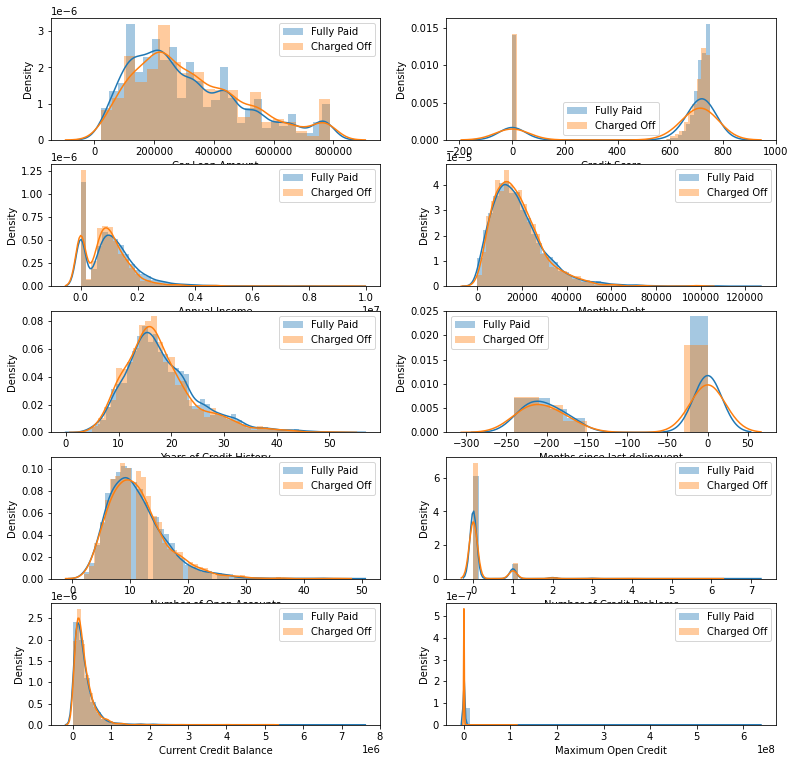

In [32]:
plt.figure(figsize=(13,13))
for i in range(1, 11):
    plt.subplot(5,2,i)
    sns.distplot(dataframe.loc[dataframe['CarLoan Status']=='Fully Paid', Continuous[i]], label='Fully Paid')
    sns.distplot(dataframe.loc[dataframe['CarLoan Status']=='Charged Off', Continuous[i]], label= 'Charged Off')
    plt.legend(loc = 'best')
plt.show()

In [33]:
Continuous.remove('CarLoan Status')
Category.remove('CarLoan Status')

In [34]:

scale = MinMaxScaler().fit(dataframe[Continuous])
scaled_dataframe = pd.DataFrame(scale.transform(dataframe[Continuous]), columns= Continuous, index= dataframe.index)

In [35]:
df_dummies = pd.get_dummies(dataframe[Category], drop_first= True)
df_dummies

,Term_Short Term
0,1
1,1
3,0
4,1
5,1
...,...
9995,1
9996,0
9997,1
9998,1


In [36]:
findataframe = pd.concat([scaled_dataframe, df_dummies], axis= 1)
findataframe

,Car Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Term_Short Term
0,0.552276,0.944075,0.123437,0.043254,0.274194,1.000000,0.086957,0.142857,0.030737,0.000659,0.2,0.0,1
1,0.313768,0.000000,0.000000,0.276179,0.352823,0.033333,0.717391,0.000000,0.030978,0.001345,0.0,0.0,1
3,0.424940,0.960053,0.085317,0.072511,0.169355,1.000000,0.152174,0.000000,0.034528,0.000612,0.0,0.0,0
4,0.201593,0.000000,0.000000,0.171199,0.050403,1.000000,0.282609,0.000000,0.034141,0.000675,0.0,0.0,1
5,0.241173,0.970706,0.094823,0.135765,0.276210,1.000000,0.086957,0.000000,0.029002,0.000431,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.159091,0.980027,0.108363,0.107682,0.090726,0.166667,0.260870,0.000000,0.031700,0.000955,0.0,0.0,1
9996,0.493322,0.000000,0.000000,0.058764,0.239919,1.000000,0.021739,0.000000,0.044796,0.000668,0.0,0.0,0
9997,0.173249,1.000000,0.088156,0.088179,0.278226,1.000000,0.108696,0.000000,0.010304,0.000819,0.0,0.0,1
9998,0.316577,0.976032,0.150934,0.234850,0.145161,1.000000,0.434783,0.000000,0.043759,0.001969,0.0,0.0,1


In [37]:
temp = list(findataframe.columns)
temp.sort()
temp

['Annual Income',
 'Bankruptcies',
 'Car Loan Amount',
 'Credit Score',
 'Current Credit Balance',
 'Maximum Open Credit',
 'Monthly Debt',
 'Months since last delinquent',
 'Number of Credit Problems',
 'Number of Open Accounts',
 'Tax Liens',
 'Term_Short Term',
 'Years of Credit History']

In [38]:
loanlist = ['Term_Short Term',
            'Car Loan Amount',
            'Maximum Open Credit',
            'Number of Open Accounts']

creditlist = ['Credit Score',
              'Months since last delinquent',
              'Number of Credit Problems',
              'Bankruptcies',
              'Tax Liens']

incomelist = ['Annual Income',
              'Current Credit Balance']

In [39]:
dataset_loan = findataframe[loanlist]
dataset_credit = findataframe[creditlist]
dataset_income = findataframe[incomelist]

target = dataframe['CarLoan Status']
target = target.replace('Fully Paid', 1)
target = target.replace('Charged Off', 0)


xtrain_loan, xtest_loan, ytrain, ytest = train_test_split(dataset_loan, target, test_size=0.2, stratify = target)

train_indexlist = list(xtrain_loan.index)
test_indexlist = list(xtest_loan.index)
xtrain_credit = dataset_credit.loc[train_indexlist]
xtest_credit = dataset_credit.loc[test_indexlist]
xtrain_income = dataset_income.loc[train_indexlist]
xtest_income = dataset_income.loc[test_indexlist]


# SUPPORT VECTOR MACHINE ALGORITHM

In [40]:
svc_loan = SVC().fit(xtrain_loan, ytrain)
svc_credit = SVC().fit(xtrain_credit, ytrain)
svc_income = SVC().fit(xtrain_income, ytrain)

In [41]:
print(svc_loan.score(xtrain_loan, ytrain))
print(svc_loan.score(xtest_loan, ytest))
print('-'*20)
print(svc_credit.score(xtrain_credit, ytrain))
print(svc_credit.score(xtest_credit, ytest))
print('-'*20)
print(svc_income.score(xtrain_income, ytrain))
print(svc_income.score(xtest_income, ytest))

0.7396700042307149
0.7399887196841511
--------------------
0.7396700042307149
0.7399887196841511
--------------------
0.7396700042307149
0.7399887196841511


# Final Accuracy of SVM

In [45]:
print('Final Accuracy of SVM :',svc_loan.score(xtest_loan, ytest))

Final Accuracy of SVM : 0.7399887196841511


# K NEAREST NEIGHBOUR ALGORITHM

In [46]:
knn_loan = KNNClassifier().fit(xtrain_loan, ytrain)
knn_credit = KNNClassifier().fit(xtrain_credit, ytrain)
knn_income = KNNClassifier().fit(xtrain_income, ytrain)

In [47]:
print(knn_loan.score(xtrain_loan, ytrain))
print(knn_loan.score(xtest_loan, ytest))
print('-'*20)
print(knn_credit.score(xtrain_credit, ytrain))
print(knn_credit.score(xtest_credit, ytest))
print('-'*20)
print(knn_income.score(xtrain_income, ytrain))
print(knn_income.score(xtest_income, ytest))

0.7781695106472994
0.676818950930626
--------------------
0.7467211958821041
0.6892272983643543
--------------------
0.7753490339867437
0.6835871404399323


# Final Accuracy of KNN

In [48]:
print('Final Accuracy of KNN :', knn_loan.score(xtest_loan, ytest))

Final Accuracy of KNN : 0.676818950930626
